In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
# Read Confirmed Global Cases
df_confirmed_global = pd.read_csv('./covid19/covid19_confirmed_global.csv')

# Read Recovered Global Cases
df_recovered_global = pd.read_csv('./covid19/covid19_recovered_global.csv')

# Read Death Global Cases
df_death_global = pd.read_csv('./covid19/covid19_death_global.csv')

In [3]:
df_confirmed_global.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long'}, inplace=True)
df_recovered_global.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long'}, inplace=True)
df_death_global.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long'}, inplace=True)

In [4]:
df_confirmed_global.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [5]:
df_recovered_global.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,2,5,5,10,10,10
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,31,31,33,44,52,67,76,89,99
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,29,31,31,37,46,61,61,62,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,10,10,10,10,16,21
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,2


In [6]:
df_death_global.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


In [7]:
# Filter the confirmed row of SL
df_confirmed_SL = df_confirmed_global.loc[df_confirmed_global['country'] == 'Sri Lanka']
df_confirmed_SL

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
202,NaN,Sri Lanka,7.0,81.0,0,0,0,0,0,1,...,106,106,113,117,122,143,146,151,159,166


In [8]:
# Filter the recovered row of SL
df_recovered_SL = df_recovered_global.loc[df_recovered_global['country'] == 'Sri Lanka']
df_recovered_SL

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
200,NaN,Sri Lanka,7.0,81.0,0,0,0,0,0,0,...,7,7,9,11,15,17,21,21,24,27


In [9]:
# Filter the death row of SL
df_death_SL = df_death_global.loc[df_death_global['country'] == 'Sri Lanka']
df_death_SL

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
202,NaN,Sri Lanka,7.0,81.0,0,0,0,0,0,0,...,0,0,1,1,2,2,3,4,4,5


In [10]:
# Filter the confirmed columns and confirmed cases
ds = df_confirmed_SL.columns[4:]
confirmed_cases = df_confirmed_SL.iloc[0, 4:].values

In [11]:
# Filter the recovered columns and recovered cases
ds = df_recovered_SL.columns[4:]
recovered_cases = df_recovered_SL.iloc[0, 4:].values

In [12]:
# Filter the death columns and death cases
ds = df_death_SL.columns[4:]
death_cases = df_death_SL.iloc[0, 4:].values

In [13]:
# Make a new df
df_SL = pd.DataFrame({'ds': ds, 'confirmed': confirmed_cases, 'recovered': recovered_cases, 'deaths': death_cases})
df_SL['ds'] = pd.to_datetime(df_SL['ds'])

In [14]:
# Find the active cases
df_SL['active'] = df_SL['confirmed'] - (df_SL['recovered'] + df_SL['deaths'])

In [15]:
# New df
df_SL.tail()

,ds,confirmed,recovered,deaths,active
69,2020-03-31,143,17,2,124
70,2020-04-01,146,21,3,122
71,2020-04-02,151,21,4,126
72,2020-04-03,159,24,4,131
73,2020-04-04,166,27,5,134


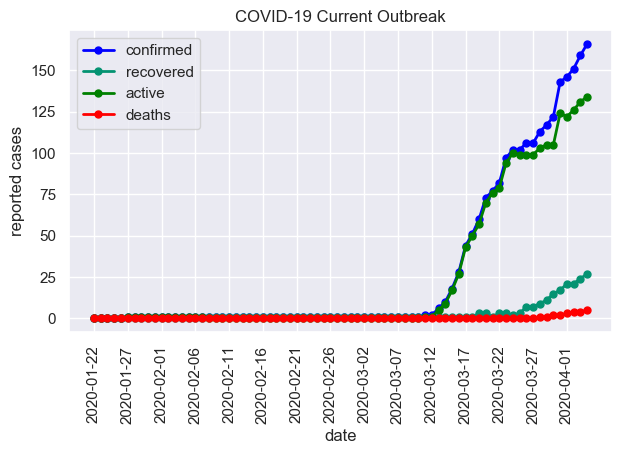

In [16]:
# sns_plot = sns.relplot(x='ds', y='confirmed', data=df_SL, kind='line')

sns.set(style='darkgrid')

plt.figure(figsize=(7, 4), dpi=100)
plt.plot(df_SL['ds'], df_SL['confirmed'], label='confirmed', linewidth=2, marker='.', markersize=10, color='blue')
plt.plot(df_SL['ds'], df_SL['recovered'], label='recovered', linewidth=2, marker='.', markersize=10, color='#049372')
plt.plot(df_SL['ds'], df_SL['active'], label='active', linewidth=2, marker='.', markersize=10, color='green')
plt.plot(df_SL['ds'], df_SL['deaths'], label='deaths', linewidth=2, marker='.', markersize=10, color='red')

plt.xticks(df_SL['ds'][::5], rotation=90)
plt.title('COVID-19 Current Outbreak')
plt.xlabel('date')
plt.ylabel('reported cases')

plt.legend()
plt.savefig('covid_outbreak.png', dpi=100)
plt.show()


### Predict Confirmed Cases By Next 10 Days

In [17]:
df_confirmed_SL = df_SL[['ds', 'confirmed']]
df_confirmed_SL.columns = ['ds', 'y']
df_confirmed_SL.tail()

,ds,y
69,2020-03-31,143
70,2020-04-01,146
71,2020-04-02,151
72,2020-04-03,159
73,2020-04-04,166


In [35]:
# Build a Model
m1 = Prophet(interval_width=0.95)

# Train the model
m1.fit(df_confirmed_SL.tail())

future_confirmed = m1.make_future_dataframe(periods=10)
future_confirmed.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds
5,2020-04-05
6,2020-04-06
7,2020-04-07
8,2020-04-08
9,2020-04-09
10,2020-04-10
11,2020-04-11
12,2020-04-12
13,2020-04-13
14,2020-04-14


In [36]:
forecast_confirmed = m1.predict(future_confirmed)
forecast_confirmed = forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast_confirmed

,ds,yhat,yhat_lower,yhat_upper
5,2020-04-05,173.0,169.346856,175.929678
6,2020-04-06,180.0,170.215663,188.983554
7,2020-04-07,187.0,169.681464,204.455434
8,2020-04-08,194.0,168.336064,220.087271
9,2020-04-09,201.0,165.099183,237.975101
10,2020-04-10,208.0,163.402449,256.069814
11,2020-04-11,215.0,162.779898,274.224901
12,2020-04-12,222.0,160.917634,291.306371
13,2020-04-13,229.0,155.928038,308.161405
14,2020-04-14,236.0,148.227047,330.693332


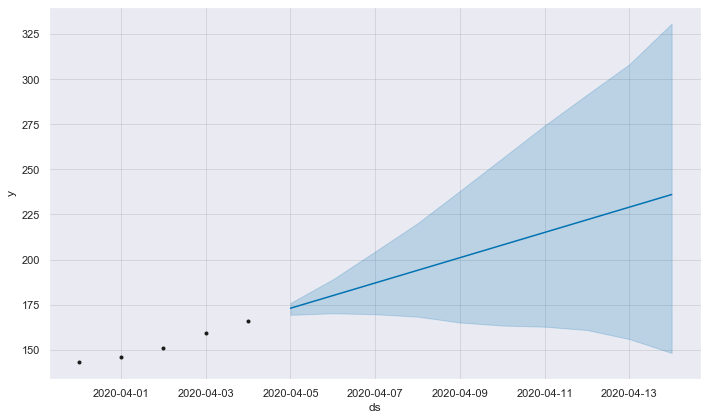

In [37]:
# Ploting forecast
confirmed_forecast_plot = m1.plot(forecast_confirmed)

In [31]:
# Ploting components
# confirmed_component_plot = m1.plot_components(forecast_confirmed)

## Predict Recovered Cases By Next 10 Days

In [33]:
df_recovered_SL = df_SL[['ds', 'recovered']]
df_recovered_SL.columns = ['ds', 'y']
df_recovered_SL.tail()

,ds,y
69,2020-03-31,17
70,2020-04-01,21
71,2020-04-02,21
72,2020-04-03,24
73,2020-04-04,27


In [40]:
# Build a Model
m2 = Prophet(interval_width=0.95)

# Train the model
m2.fit(df_recovered_SL.tail())

future_recovered = m2.make_future_dataframe(periods=10)
future_recovered.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds
5,2020-04-05
6,2020-04-06
7,2020-04-07
8,2020-04-08
9,2020-04-09
10,2020-04-10
11,2020-04-11
12,2020-04-12
13,2020-04-13
14,2020-04-14


In [41]:
forecast_recovered = m2.predict(future_recovered)
forecast_recovered = forecast_recovered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast_recovered

,ds,yhat,yhat_lower,yhat_upper
5,2020-04-05,28.895680,27.226888,30.404118
6,2020-04-06,31.194511,29.805120,32.772325
7,2020-04-07,33.493341,31.906159,35.021896
8,2020-04-08,35.792172,34.149093,37.289853
9,2020-04-09,38.091003,36.479221,39.680707
10,2020-04-10,40.389834,38.827341,41.923898
11,2020-04-11,42.688665,41.087439,44.212753
12,2020-04-12,44.987495,43.499976,46.493929
13,2020-04-13,47.286326,45.767203,48.851421
14,2020-04-14,49.585157,48.065924,50.979525


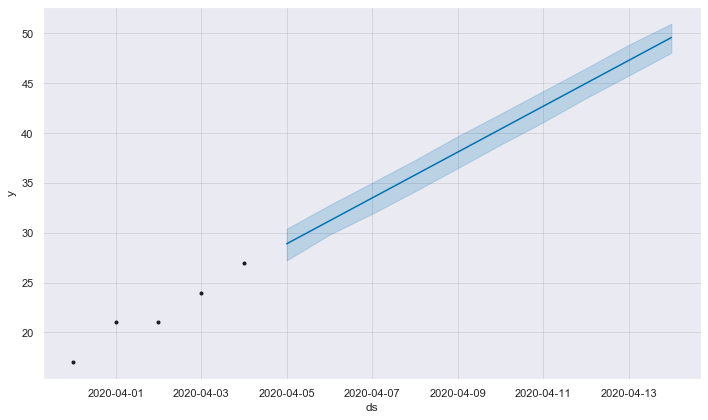

In [42]:
# Ploting forecast
recovered_forecast_plot = m2.plot(forecast_recovered)

In [ ]:
# Ploting components
recovered_component_plot = m2.plot_components(forecast_recovered)

## Predict the deaths by next 10 days

In [43]:
df_death_SL = df_SL[['ds', 'deaths']]
df_death_SL.columns = ['ds', 'y']
df_death_SL.tail()

,ds,y
69,2020-03-31,2
70,2020-04-01,3
71,2020-04-02,4
72,2020-04-03,4
73,2020-04-04,5


In [44]:
# Build a Model
m3 = Prophet(interval_width=0.95)

# Train the model
m3.fit(df_death_SL.tail())

future_deaths = m3.make_future_dataframe(periods=10)
future_deaths.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds
5,2020-04-05
6,2020-04-06
7,2020-04-07
8,2020-04-08
9,2020-04-09
10,2020-04-10
11,2020-04-11
12,2020-04-12
13,2020-04-13
14,2020-04-14


In [45]:
forecast_death = m3.predict(future_deaths)
forecast_death = forecast_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast_death

,ds,yhat,yhat_lower,yhat_upper
5,2020-04-05,5.699326,5.188443,6.169119
6,2020-04-06,6.399155,5.913174,6.869295
7,2020-04-07,7.098983,6.609470,7.542451
8,2020-04-08,7.798812,7.305066,8.290904
9,2020-04-09,8.498641,8.021607,8.959119
10,2020-04-10,9.198470,8.735024,9.688637
11,2020-04-11,9.898299,9.419328,10.360232
12,2020-04-12,10.598127,10.133789,11.039963
13,2020-04-13,11.297956,10.843272,11.777050
14,2020-04-14,11.997785,11.491714,12.461436


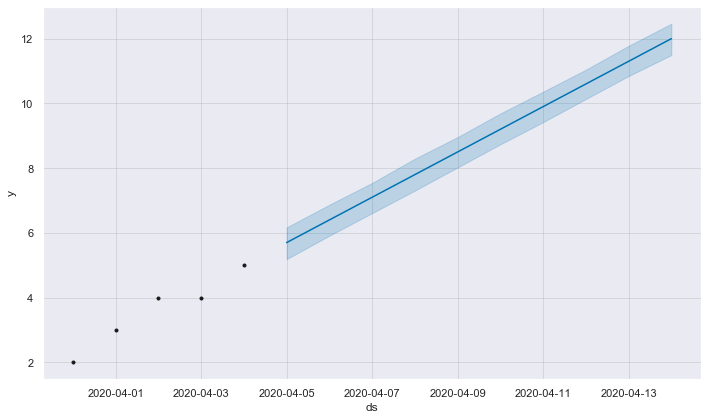

In [46]:
# Ploting forecast
death_forecast_plot = m3.plot(forecast_death)

In [ ]:
# Ploting components
death_component_plot = m3.plot_components(forecast)

## Plotting with pyplots

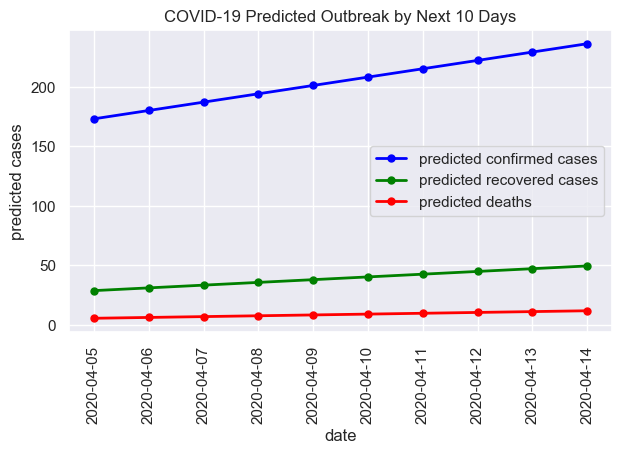

In [47]:
sns.set(style='darkgrid')
plt.figure(figsize=(7, 4), dpi=100)
plt.plot(forecast_confirmed['ds'], forecast_confirmed['yhat'], label='predicted confirmed cases', marker='.', markersize=10, linewidth=2, color='blue')
plt.plot(forecast_recovered['ds'], forecast_recovered['yhat'], label='predicted recovered cases', marker='.', markersize=10, linewidth=2, color='green')
plt.plot(forecast_death['ds'], forecast_death['yhat'], label='predicted deaths', marker='.', markersize=10, linewidth=2, color='red')

plt.title('COVID-19 Predicted Outbreak by Next 10 Days')
plt.xlabel('date')
plt.ylabel('predicted cases')
plt.xticks(forecast_confirmed['ds'], rotation=90)
plt.legend()

plt.savefig('predicted.png')
plt.show()

In [48]:
# Joining df
frames = [forecast_confirmed[['ds', 'yhat']], forecast_recovered['yhat'], forecast_death['yhat']]
new_df = pd.concat(frames, axis=1)
new_df.columns = ['Date', 'Confirmed', 'Recovered', 'Deaths']
new_df['Confirmed'] = np.around(new_df['Confirmed'])
new_df['Recovered'] = np.around(new_df['Recovered'])
new_df['Deaths'] = np.around(new_df['Deaths'])

In [49]:
new_df.set_index('Date')

,Confirmed,Recovered,Deaths
Date,,,
2020-04-05,173.0,29.0,6.0
2020-04-06,180.0,31.0,6.0
2020-04-07,187.0,33.0,7.0
2020-04-08,194.0,36.0,8.0
2020-04-09,201.0,38.0,8.0
2020-04-10,208.0,40.0,9.0
2020-04-11,215.0,43.0,10.0
2020-04-12,222.0,45.0,11.0
2020-04-13,229.0,47.0,11.0
